In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set()
pd.set_option('display.max_columns', None)

In [46]:
%load_ext memory_profiler

In [28]:
def sm():
    """исследуемая функция"""
    sm = 0
    for i in range(1000):
        sm += i
    return sm


In [4]:
%timeit sm()

70.9 µs ± 3.74 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [5]:
%memit sm()

peak memory: 119.87 MiB, increment: 0.11 MiB


In [3]:
%prun sm()


In [44]:
%load_ext line_profiler

The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


In [49]:
%mprun -f sm

ERROR: Could not find file <ipython-input-28-1c6147451ae2>
NOTE: %mprun can only be used on functions defined in physical files, and not in the IPython environment.



In [5]:
%lprun -f sm()

C:\ProgramData\Anaconda3\lib\site-packages\line_profiler\line_profiler.py:344: UserWarning: Could not extract a code object for the object 499500
  profile = LineProfiler(*funcs)


In [6]:
import line_profiler
lp = line_profiler.LineProfiler()
lp.add_function(sm)
lp.runctx('sm()', locals=locals(), globals=globals())
lp.print_stats()

Timer unit: 3.3094e-07 s

Total time: 0.00104279 s
File: <ipython-input-2-4a243120c7e7>
Function: sm at line 1

Line #      Hits         Time  Per Hit   % Time  Line Contents
     1                                           def sm():
     2         1          5.0      5.0      0.2      sm = 0
     3      1001       1508.0      1.5     47.9      for i in range(1000):
     4      1000       1637.0      1.6     52.0          sm += i
     5         1          1.0      1.0      0.0      return sm



In [39]:
arr1 = pd.DataFrame(np.random.rand(100, 100))
arr2 = pd.DataFrame(np.random.rand(100, 100))
arr3 = pd.DataFrame(np.random.rand(100, 100))

In [8]:
%%timeit
for i in range(100):
    for j in range(100):
        arr3[i][j] = arr1[i][j] / arr2[i][j]

916 ms ± 16.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [12]:
%%memit
arr4 = arr1 / arr2

peak memory: 122.59 MiB, increment: 0.57 MiB


In [43]:
%lsmagic


Available line magics:
%alias  %alias_magic  %autoawait  %autocall  %automagic  %autosave  %bookmark  %cd  %clear  %cls  %colors  %conda  %config  %connect_info  %copy  %ddir  %debug  %dhist  %dirs  %doctest_mode  %echo  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %lprun  %ls  %lsmagic  %macro  %magic  %matplotlib  %mkdir  %more  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %pip  %popd  %pprint  %precision  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %ren  %rep  %rerun  %reset  %reset_selective  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%cmd  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%markdown  %%perl  %%prun  %%pypy  %

In [42]:
?arr1.add

In [156]:
df = pd.DataFrame(np.random.normal(size=(1000, 3)),
                                columns=['a', 'b', 'c'])
df.head()

,a,b,c
0,0.029219,-2.903424,-0.500705
1,-0.581401,-0.691049,0.618647
2,1.048681,-1.142982,0.863099
3,-0.674633,0.932612,-0.234586
4,-0.226700,0.619903,0.233450


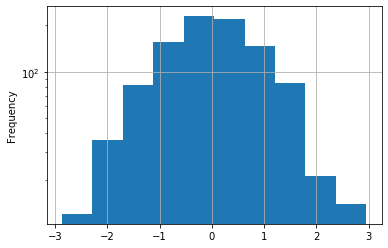

In [127]:
df.b.plot(kind='hist', logy=True, grid=True);

In [51]:
pd.to_datetime(1434340848, unit='s')

Timestamp('2015-06-15 04:00:48')

In [81]:
df.loc[(df.a < -1) & (df.b > 1), 'c']

31   -0.573576
35    0.318506
88    0.095291
Name: c, dtype: float64

In [105]:
import scipy

In [132]:
scipy.stats.shapiro(df)

(0.9995960593223572, 0.8290085792541504)

In [131]:
scipy.stats.normaltest(df)

NormaltestResult(statistic=array([4.10452135, 0.76544463, 1.78599902]), pvalue=array([0.1284442 , 0.68200226, 0.40942583]))

In [172]:
scipy.stats.ttest_ind(df.a[:500], df.a[500:])

Ttest_indResult(statistic=-0.00378764875375555, pvalue=0.9969786577148051)

In [194]:
df['d'] = df.a + 0.1 * abs(df.b)
df

,a,b,c,d
0,0.029219,-2.903424,-0.500705,0.319561
1,-0.581401,-0.691049,0.618647,-0.512296
2,1.048681,-1.142982,0.863099,1.162979
3,-0.674633,0.932612,-0.234586,-0.581372
4,-0.226700,0.619903,0.233450,-0.164710
...,...,...,...,...
995,-0.810591,-1.918957,0.458101,-0.618696
996,0.230917,1.234558,-1.935713,0.354372
997,-0.606310,-2.342535,-0.613960,-0.372057
998,0.238668,0.246697,-0.116900,0.263338


In [195]:
scipy.stats.ttest_rel(df['a'], df['d'])

Ttest_relResult(statistic=-41.670442565038016, pvalue=9.760891545699535e-221)

In [198]:
np.mgrid[-3:3:7j, -3:3:7j]

array([[[-3., -3., -3., -3., -3., -3., -3.],
        [-2., -2., -2., -2., -2., -2., -2.],
        [-1., -1., -1., -1., -1., -1., -1.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 1.,  1.,  1.,  1.,  1.,  1.,  1.],
        [ 2.,  2.,  2.,  2.,  2.,  2.,  2.],
        [ 3.,  3.,  3.,  3.,  3.,  3.,  3.]],

       [[-3., -2., -1.,  0.,  1.,  2.,  3.],
        [-3., -2., -1.,  0.,  1.,  2.,  3.],
        [-3., -2., -1.,  0.,  1.,  2.,  3.],
        [-3., -2., -1.,  0.,  1.,  2.,  3.],
        [-3., -2., -1.,  0.,  1.,  2.,  3.],
        [-3., -2., -1.,  0.,  1.,  2.,  3.],
        [-3., -2., -1.,  0.,  1.,  2.,  3.]]])

In [205]:
arr = np.arange(6)
arr.resize(2, 3)
arr

array([[0, 1, 2],
       [3, 4, 5]])

In [206]:
df['e'] = df['d'] / 0
df

,a,b,c,d,e
0,0.029219,-2.903424,-0.500705,0.319561,inf
1,-0.581401,-0.691049,0.618647,-0.512296,-inf
2,1.048681,-1.142982,0.863099,1.162979,inf
3,-0.674633,0.932612,-0.234586,-0.581372,-inf
4,-0.226700,0.619903,0.233450,-0.164710,-inf
...,...,...,...,...,...
995,-0.810591,-1.918957,0.458101,-0.618696,-inf
996,0.230917,1.234558,-1.935713,0.354372,inf
997,-0.606310,-2.342535,-0.613960,-0.372057,-inf
998,0.238668,0.246697,-0.116900,0.263338,inf


In [211]:
np.random.randint(0, 10, size=100)

array([8, 3, 0, 5, 1, 6, 5, 3, 6, 6, 3, 0, 7, 2, 6, 7, 1, 7, 0, 7, 2, 7,
       1, 2, 3, 8, 3, 3, 1, 0, 0, 1, 4, 3, 8, 9, 9, 6, 5, 8, 6, 0, 8, 0,
       8, 2, 9, 6, 0, 0, 6, 3, 4, 8, 2, 2, 4, 5, 3, 2, 9, 5, 7, 0, 4, 7,
       9, 6, 0, 9, 8, 2, 3, 8, 2, 1, 1, 4, 9, 5, 7, 1, 5, 7, 5, 7, 2, 0,
       8, 1, 7, 6, 6, 5, 2, 0, 1, 0, 9, 5])

In [7]:
from tqdm import tqdm
import time

pbar = tqdm(["a","b","c","d", "e", "f", "g"])
for c in pbar:
    if c == 'c':
        time.sleep(1.5)
    time.sleep(0.5)
    pbar.set_description("Processing %s"%c)

Processing g: 100%|██████████████████████████████████████████████████████████████████████| 7/7 [00:05<00:00,  1.38it/s]


In [4]:
from tqdm.notebook import tqdm
import time

#totalParameter установка общей длины индикатора выполнения
with tqdm(total=100) as pbar:
  for i in range(100):
    time.sleep(0.05)
    # Обновлять длину индикатора выполнения каждый раз
    pbar.update(1)

In [2]:
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm

df = pd.DataFrame(np.random.randint(0, 100, (10000000, 6)))

# Register `pandas.progress_apply` and `pandas.Series.map_apply` with `tqdm`
# (can use `tqdm.gui.tqdm`, `tqdm.notebook.tqdm`, optional kwargs, etc.)
# tqdm.pandas(desc="my bar!")
tqdm.pandas()

# Now you can use `progress_apply` instead of `apply`
# and `progress_map` instead of `map`
df.progress_apply(lambda x: x**2)
# can also groupby:
# df.groupby(0).progress_apply(lambda x: x**2)

C:\ProgramData\Anaconda3\lib\site-packages\tqdm\std.py:658: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


,0,1,2,3,4,5
0,6561,6561,961,5041,64,2500
1,4624,7225,4,1156,7396,1024
2,1296,7744,5184,0,2304,8464
3,5929,5776,1849,7225,8464,1225
4,9,6561,49,8100,441,121
...,...,...,...,...,...,...
9999995,7921,36,100,676,441,3844
9999996,9216,7056,5184,441,2500,484
9999997,4356,256,196,2916,4356,0
9999998,361,2025,324,36,4096,9604


In [3]:
from tqdm.notebook import trange, tqdm
from time import sleep

for i in trange(3, desc='1st loop'):
    for j in tqdm(range(100), desc='2nd loop'):
        sleep(0.01)

In [5]:
pd.DataFrame(np.random.randint(0, 11, (3, 3)), columns=list('ABC'))

,A,B,C
0,4,1,4
1,5,1,4
2,9,7,2


In [14]:
df = pd.DataFrame({'gender': np.random.choice(['m', 'f'], size=50), 'math_score': np.random.randint(0, 101, 50)})
df

,gender,math_score
0,f,61
1,f,63
2,f,52
3,f,67
4,m,92
5,m,19
6,m,74
7,f,3
8,m,98
9,m,40


In [18]:
df.sort_values(['gender','math_score'], ascending=[True, False])\
    .groupby('gender')\
    .head(5)

,gender,math_score
44,f,97
49,f,96
10,f,93
18,f,90
20,f,89
16,m,100
8,m,98
21,m,98
26,m,94
4,m,92


In [21]:
df.values.nbytes

800

In [26]:
np.random.seed(42)

In [27]:
np.random.randint(0, 10, 4)

array([6, 3, 7, 4])

In [28]:
np.random.randint(0, 10, 4)

array([6, 9, 2, 6])

In [29]:
np.random.seed(42)

In [30]:
np.random.randint(0, 10, 4)

array([6, 3, 7, 4])

In [31]:
np.random.randint(0, 10, 4)

array([6, 9, 2, 6])

In [33]:
rng = np.random.RandomState(42)

In [34]:
rng.randint(0, 10, 4)

array([6, 3, 7, 4])

In [35]:
rng.randint(0, 10, 4)

array([6, 9, 2, 6])

In [36]:
rng = np.random.RandomState(42)

In [37]:
rng.randint(0, 10, 4)

array([6, 3, 7, 4])

In [38]:
rng.randint(0, 10, 4)

array([6, 9, 2, 6])

In [33]:
df = pd.DataFrame(np.random.randint(0, 100, (10000, 100)))

In [4]:
from tqdm import tqdm
tqdm.pandas()

In [35]:
df.progress_applymap(lambda x: np.sin(x))
# progress_map()

100%|████████████████████████████| 1000000/1000000 [00:04<00:00, 209149.29it/s]


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.992873,-0.536573,0.017702,0.670229,0.920026,-0.026551,0.296369,-0.905578,0.412118,-0.966118,...,0.963795,0.893997,0.901788,0.762558,0.999912,-0.544021,-0.245252,0.656987,-0.676772,0.986628
1,-0.132352,0.017702,-0.750987,-0.993889,-0.756802,0.656987,0.436165,0.551427,-0.993889,-0.916522,...,0.656987,-0.831775,-0.676772,-0.905578,0.989358,-0.428183,0.436165,0.999520,0.412118,0.992873
2,-0.905578,-0.831775,0.986628,0.395925,0.296369,-0.558789,-0.821818,0.395925,-0.404038,0.762558,...,0.733190,0.826829,0.989358,-0.304811,0.826829,-0.176076,-0.643538,0.968364,0.149877,-0.756802
3,-0.444113,-0.245252,0.513978,-0.821818,0.745113,0.990607,0.920026,0.566108,0.850904,-0.905578,...,0.105988,0.270906,0.395925,0.983588,-0.923458,-0.158623,0.551427,0.270906,-0.245252,0.826829
4,0.986628,-0.287903,0.513978,-0.750987,-0.428183,-0.855520,-0.026551,-0.176076,-0.026551,0.656987,...,-0.768255,-0.905578,-0.961397,-0.821818,-0.245252,-0.132352,-0.287903,-0.573382,0.773891,0.860069
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-0.132352,0.149877,0.683262,-0.008851,0.035398,-0.521551,-0.999990,-0.663634,0.990607,0.105988,...,-0.966118,-0.404038,0.650288,0.529083,-0.387782,-0.855520,-0.643538,-0.916522,-0.158623,0.745113
9996,0.912945,-0.750987,0.412118,0.636738,-0.993889,-0.279415,-0.676772,-0.404038,-0.739181,-0.404038,...,0.893997,-0.245252,-0.114785,-0.629888,-0.026551,-0.544021,-0.831775,-0.846220,0.253823,-0.953753
9997,-0.916522,-0.988032,-0.663634,-0.831775,0.999520,0.893997,-0.262375,-0.629888,-0.988032,-0.988032,...,0.000000,-0.132352,0.566108,-0.387782,-0.821818,0.920026,-0.663634,-0.750987,0.951055,0.566108
9998,0.762558,-0.629888,-0.279415,0.017702,-0.676772,-0.132352,0.035398,-0.573382,0.836656,0.841471,...,-0.262375,-0.521551,-0.287903,0.956376,0.893997,0.683262,-0.988032,-0.008851,0.270906,0.745113


In [31]:
df[0].progress_map(lambda x: np.sin(x))

100%|████████████████████████████████| 10000/10000 [00:00<00:00, 161280.93it/s]


0       0.683262
1      -0.923458
2      -0.999755
3      -0.387782
4      -0.993889
          ...   
9995   -0.993889
9996   -0.026551
9997    0.683262
9998   -0.905578
9999   -0.026551
Name: 0, Length: 10000, dtype: float64

In [2]:
df= sns.load_dataset('taxis')
df.sample(10)

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
5140,2019-03-04 19:57:14,2019-03-04 20:02:27,1,1.02,5.5,1.96,0.0,11.76,yellow,credit card,Lincoln Square East,Lincoln Square East,Manhattan,Manhattan
1980,2019-03-06 20:59:57,2019-03-06 21:19:00,1,3.53,15.0,3.76,0.0,22.56,yellow,credit card,Times Sq/Theatre District,Long Island City/Hunters Point,Manhattan,Queens
3155,2019-03-07 17:56:18,2019-03-07 18:10:01,3,1.79,10.0,0.00,0.0,14.30,yellow,cash,Little Italy/NoLiTa,Murray Hill,Manhattan,Manhattan
1135,2019-03-26 22:43:51,2019-03-26 22:50:28,1,1.03,6.5,2.06,0.0,12.36,yellow,credit card,SoHo,Greenwich Village North,Manhattan,Manhattan
4937,2019-03-02 19:50:23,2019-03-02 20:04:19,2,1.60,10.0,2.75,0.0,16.55,yellow,credit card,TriBeCa/Civic Center,East Village,Manhattan,Manhattan
752,2019-03-14 18:05:49,2019-03-14 18:10:43,1,0.40,5.0,0.00,0.0,9.30,yellow,cash,Greenwich Village South,Little Italy/NoLiTa,Manhattan,Manhattan
4884,2019-03-06 08:49:58,2019-03-06 08:58:39,3,1.40,8.0,0.00,0.0,11.30,yellow,cash,Upper West Side South,Central Park,Manhattan,Manhattan
1484,2019-03-08 18:22:44,2019-03-08 18:27:26,1,0.88,5.5,0.00,0.0,9.80,yellow,cash,Upper West Side South,Upper West Side North,Manhattan,Manhattan
6390,2019-03-19 09:32:20,2019-03-19 09:36:22,1,0.70,5.0,0.00,0.0,5.80,green,cash,Morningside Heights,Central Harlem North,Manhattan,Manhattan
2296,2019-03-20 23:23:46,2019-03-20 23:27:54,1,0.40,4.5,1.65,0.0,9.95,yellow,credit card,Sutton Place/Turtle Bay North,Midtown Center,Manhattan,Manhattan


In [4]:
df.describe(include='all')

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
count,6433,6433,6433.000000,6433.000000,6433.000000,6433.00000,6433.000000,6433.000000,6433,6389,6407,6388,6407,6388
unique,6414,6425,NaN,NaN,NaN,NaN,NaN,NaN,2,2,194,203,4,5
top,2019-03-07 19:54:40,2019-03-22 11:06:48,NaN,NaN,NaN,NaN,NaN,NaN,yellow,credit card,Midtown Center,Upper East Side North,Manhattan,Manhattan
freq,2,2,NaN,NaN,NaN,NaN,NaN,NaN,5451,4577,230,245,5268,5206
mean,NaN,NaN,1.539251,3.024617,13.091073,1.97922,0.325273,18.517794,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,1.203768,3.827867,11.551804,2.44856,1.415267,13.815570,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,0.000000,0.000000,1.000000,0.00000,0.000000,1.300000,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,1.000000,0.980000,6.500000,0.00000,0.000000,10.800000,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,1.000000,1.640000,9.500000,1.70000,0.000000,14.160000,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,2.000000,3.210000,15.000000,2.80000,0.000000,20.300000,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.T.describe()

,0,1,2,3,4,5,6,7,8,9,...,6423,6424,6425,6426,6427,6428,6429,6430,6431,6432
count,14,14,14,14,14,14,14,13,14,14,...,14,14,14,14,14.0,14,14.0,14,14,14
unique,13,11,13,13,13,13,13,10,12,12,...,12,12,12,13,12.0,13,13.0,12,12,13
top,Manhattan,Upper West Side South,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,0,Manhattan,Manhattan,...,Queens,Manhattan,Brooklyn,Manhattan,20.0,Manhattan,0.0,Brooklyn,Brooklyn,Brooklyn
freq,2,2,2,2,2,2,2,3,2,2,...,2,2,2,2,2.0,2,2.0,2,2,2


In [5]:
df = pd.DataFrame(np.random.randn(5,5))
df

,0,1,2,3,4
0,0.075130,0.698190,0.914568,-2.039216,-0.495184
1,-0.797642,-0.748421,-1.980526,-0.245917,-0.214399
2,0.257646,-1.530694,-1.010151,1.165670,-0.564885
3,0.127821,0.466776,-0.684716,0.801680,-0.282858
4,0.342289,1.070417,0.620291,0.211575,0.870712


In [16]:
df2 = df.iloc[1:4, 1:4]

In [17]:
df2

,1,2,3
1,-0.748421,1000.0,-0.245917
2,-1.530694,1000.0,1.165670
3,0.466776,1000.0,0.801680


In [22]:
df2.loc[:, :] = 1000

In [23]:
df2

,1,2,3
1,1000.0,1000.0,1000.0
2,1000.0,1000.0,1000.0
3,1000.0,1000.0,1000.0


In [24]:
df

,0,1,2,3,4
0,0.075130,0.698190,0.914568,-2.039216,-0.495184
1,-0.797642,1000.000000,1000.000000,1000.000000,-0.214399
2,0.257646,1000.000000,1000.000000,1000.000000,-0.564885
3,0.127821,1000.000000,1000.000000,1000.000000,-0.282858
4,0.342289,1.070417,0.620291,0.211575,0.870712


In [112]:
np.arange(9).shape

(9,)

In [113]:
np.arange(9).reshape(1, 9).shape

(1, 9)

In [117]:
np.arange(9).reshape(1, 9).ravel().shape

(9,)

In [40]:
max_depth_value = range(0,10)
train_score = range(0,10)
test_score = range(0,10)
scores_data = pd.DataFrame()

In [41]:
for max_depth in max_depth_value:
    temp_scores_data = pd.DataFrame([{'max_depth': max_depth,
                                    "train_score": train_score[max_depth],
                                    'test_score': test_score[max_depth]}])
    scores_data = pd.concat([temp_scores_data, scores_data], ignore_index=True)

In [42]:
scores_data

,max_depth,train_score,test_score
0,9,9,9
1,8,8,8
2,7,7,7
3,6,6,6
4,5,5,5
5,4,4,4
6,3,3,3
7,2,2,2
8,1,1,1
9,0,0,0


In [6]:
def palindrome_check(s):
    return s == s[::-1]

palindrome_check('dsfgads')

False

In [12]:
def anagram_check(s1, s2):
    return sorted(s1.lower()) == sorted(s2.lower())

anagram_check('песнь', 'снедь')

False

In [20]:
def rle_encode(s):
    answer = ''
    char_now = s[0]
    char_amount = 1

    for char in s[1:]:
        if char == char_now:
            char_amount += 1
        else:
            answer += str(char_amount) + char_now
            char_now = char
            char_amount = 1
    
    answer += str(char_amount) + char_now
    char_now = char
    char_amount = 1
    
    return answer

rle_encode('WWWWWWWWWBBBWWWWWWWWWWWWWWWWWWWWWWWWBWWWWWWWWWWWWWW')

'9W3B24W1B14W'

In [3]:
df= sns.load_dataset('taxis')
df.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


In [43]:
df_total = df.groupby(['pickup_borough', 'dropoff_borough', 'payment']).agg({'total':['sum', 'count']}).T.copy()

In [44]:
df_total

pickup_borough   Bronx                                                \
dropoff_borough  Bronx                Brooklyn Manhattan               
payment           cash credit card credit card      cash credit card   
total sum        195.2       837.6      236.13      61.1      737.46   
      count       21.0        45.0        4.00       4.0       21.00   

pickup_borough                 Brooklyn                                 \
dropoff_borough      Queens       Bronx Brooklyn             Manhattan   
payment         credit card credit card     cash credit card      cash   
total sum            186.27      324.12   1171.2     2682.01    233.55   
      count            4.00        5.00    104.0      176.00     11.00   

pickup_borough                                 Manhattan                       \
dropoff_borough             Queens                 Bronx             Brooklyn   
payment         credit card   cash credit card      cash credit card     cash   
total sum           1875.87   83.9      883.93     619.1      863.63   914.79   
      count           56.00    3.0       23.00      27.0       27.00    35.00   

pickup_borough                                                          \
dropoff_borough             Manhattan               Queens               
payment         credit card      cash credit card     cash credit card   
total sum           3958.23  16130.76    56546.25  1223.82     6444.04   
      count          116.00   1298.00     3559.00    34.00      128.00   

pickup_borough                 Queens                                   \
dropoff_borough Staten Island   Bronx             Brooklyn               
payment           credit card    cash credit card     cash credit card   
total sum              153.73  257.74      329.85    490.2     2135.61   
      count              2.00    4.00        7.00     14.0       48.00   

pickup_borough                                              
dropoff_borough Manhattan               Queens              
payment              cash credit card     cash credit card  
total sum         1902.09     9469.01  2459.78     2698.41  
      count         47.00      176.00   193.00      149.00

In [45]:
df_total.columns

MultiIndex([(    'Bronx',         'Bronx',        'cash'),
            (    'Bronx',         'Bronx', 'credit card'),
            (    'Bronx',      'Brooklyn', 'credit card'),
            (    'Bronx',     'Manhattan',        'cash'),
            (    'Bronx',     'Manhattan', 'credit card'),
            (    'Bronx',        'Queens', 'credit card'),
            ( 'Brooklyn',         'Bronx', 'credit card'),
            ( 'Brooklyn',      'Brooklyn',        'cash'),
            ( 'Brooklyn',      'Brooklyn', 'credit card'),
            ( 'Brooklyn',     'Manhattan',        'cash'),
            ( 'Brooklyn',     'Manhattan', 'credit card'),
            ( 'Brooklyn',        'Queens',        'cash'),
            ( 'Brooklyn',        'Queens', 'credit card'),
            ('Manhattan',         'Bronx',        'cash'),
            ('Manhattan',         'Bronx', 'credit card'),
            ('Manhattan',      'Brooklyn',        'cash'),
            ('Manhattan',      'Brooklyn', 'credit card'

In [46]:
df_total.columns.values

array([('Bronx', 'Bronx', 'cash'), ('Bronx', 'Bronx', 'credit card'),
       ('Bronx', 'Brooklyn', 'credit card'),
       ('Bronx', 'Manhattan', 'cash'),
       ('Bronx', 'Manhattan', 'credit card'),
       ('Bronx', 'Queens', 'credit card'),
       ('Brooklyn', 'Bronx', 'credit card'),
       ('Brooklyn', 'Brooklyn', 'cash'),
       ('Brooklyn', 'Brooklyn', 'credit card'),
       ('Brooklyn', 'Manhattan', 'cash'),
       ('Brooklyn', 'Manhattan', 'credit card'),
       ('Brooklyn', 'Queens', 'cash'),
       ('Brooklyn', 'Queens', 'credit card'),
       ('Manhattan', 'Bronx', 'cash'),
       ('Manhattan', 'Bronx', 'credit card'),
       ('Manhattan', 'Brooklyn', 'cash'),
       ('Manhattan', 'Brooklyn', 'credit card'),
       ('Manhattan', 'Manhattan', 'cash'),
       ('Manhattan', 'Manhattan', 'credit card'),
       ('Manhattan', 'Queens', 'cash'),
       ('Manhattan', 'Queens', 'credit card'),
       ('Manhattan', 'Staten Island', 'credit card'),
       ('Queens', 'Bronx', 'cash'), (

In [47]:
df_total.columns = ['_'.join(col).strip() for col  in df_total.columns.values]

In [48]:
df_total

Bronx_Bronx_cash  Bronx_Bronx_credit card  \
total sum               195.2                    837.6   
      count              21.0                     45.0   

             Bronx_Brooklyn_credit card  Bronx_Manhattan_cash  \
total sum                        236.13                  61.1   
      count                        4.00                   4.0   

             Bronx_Manhattan_credit card  Bronx_Queens_credit card  \
total sum                         737.46                    186.27   
      count                        21.00                      4.00   

             Brooklyn_Bronx_credit card  Brooklyn_Brooklyn_cash  \
total sum                        324.12                  1171.2   
      count                        5.00                   104.0   

             Brooklyn_Brooklyn_credit card  Brooklyn_Manhattan_cash  \
total sum                          2682.01                   233.55   
      count                         176.00                    11.00   

             Brooklyn_Manhattan_credit card  Brooklyn_Queens_cash  \
total sum                           1875.87                  83.9   
      count                           56.00                   3.0   

             Brooklyn_Queens_credit card  Manhattan_Bronx_cash  \
total sum                         883.93                 619.1   
      count                        23.00                  27.0   

             Manhattan_Bronx_credit card  Manhattan_Brooklyn_cash  \
total sum                         863.63                   914.79   
      count                        27.00                    35.00   

             Manhattan_Brooklyn_credit card  Manhattan_Manhattan_cash  \
total sum                           3958.23                  16130.76   
      count                          116.00                   1298.00   

             Manhattan_Manhattan_credit card  Manhattan_Queens_cash  \
total sum                           56546.25                1223.82   
      count                          3559.00                  34.00   

             Manhattan_Queens_credit card  \
total sum                         6444.04   
      count                        128.00   

             Manhattan_Staten Island_credit card  Queens_Bronx_cash  \
total sum                                 153.73             257.74   
      count                                 2.00               4.00   

             Queens_Bronx_credit card  Queens_Brooklyn_cash  \
total sum                      329.85                 490.2   
      count                      7.00                  14.0   

             Queens_Brooklyn_credit card  Queens_Manhattan_cash  \
total sum                        2135.61                1902.09   
      count                        48.00                  47.00   

             Queens_Manhattan_credit card  Queens_Queens_cash  \
total sum                         9469.01             2459.78   
      count                        176.00              193.00   

             Queens_Queens_credit card  
total sum                      2698.41  
      count                     149.00

In [10]:
df.groupby(['pickup_borough', 'dropoff_borough']).agg(MatchSum = ('total', 'sum'), MatchCount = ('total', 'count'))

MatchSum  MatchCount
pickup_borough dropoff_borough                      
Bronx          Bronx             1032.80          66
               Brooklyn           236.13           4
               Manhattan          798.56          25
               Queens             186.27           4
Brooklyn       Bronx              324.12           5
               Brooklyn          3863.81         282
               Manhattan         2109.42          67
               Queens             967.83          26
Manhattan      Bronx             1489.53          55
               Brooklyn          4921.12         153
               Manhattan        73009.91        4885
               Queens            7718.92         163
               Staten Island      153.73           2
Queens         Bronx              587.59          11
               Brooklyn          2625.81          62
               Manhattan        11436.66         224
               Queens            5225.79         349

In [5]:
df = pd.DataFrame(np.random.randint(0, 100, (10, 6)))

In [6]:
df

,0,1,2,3,4,5
0,55,68,61,45,6,14
1,2,28,98,88,66,63
2,64,20,11,81,50,25
3,44,19,36,33,75,68
4,54,87,68,21,55,90
5,53,62,50,91,5,70
6,17,9,69,86,58,34
7,98,49,52,49,41,97
8,51,72,98,20,96,42
9,17,78,68,32,65,47


In [11]:
df.drop([1, 3, 5], axis=1)

,0,2,4
0,55,61,6
1,2,98,66
2,64,11,50
3,44,36,75
4,54,68,55
5,53,50,5
6,17,69,58
7,98,52,41
8,51,98,96
9,17,68,65


In [3]:
df = sns.load_dataset('taxis')
df.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


In [4]:
df[:5].pickup.dt.day
# отдает "номер" дня

0    23
1     4
2    27
3    10
4    30
Name: pickup, dtype: int64

In [10]:
df[:5].pickup.dt.to_period('D')
# выдает конкретную дату

0    2019-03-23
1    2019-03-04
2    2019-03-27
3    2019-03-10
4    2019-03-30
Name: pickup, dtype: period[D]

In [4]:
df[:5].pickup.dt.strftime('%Y-%m-%d')

0    2019-03-23
1    2019-03-04
2    2019-03-27
3    2019-03-10
4    2019-03-30
Name: pickup, dtype: object

In [8]:
df[:5].pickup

0   2019-03-23 20:21:09
1   2019-03-04 16:11:55
2   2019-03-27 17:53:01
3   2019-03-10 01:23:59
4   2019-03-30 13:27:42
Name: pickup, dtype: datetime64[ns]

In [10]:
df[:5].pickup.dt.strftime('%H:00:00 %Y-%m-%d')

0    20:00:00 2019-03-23
1    16:00:00 2019-03-04
2    17:00:00 2019-03-27
3    01:00:00 2019-03-10
4    13:00:00 2019-03-30
Name: pickup, dtype: object

In [14]:
df[:5].pickup.dt.strftime('%Y-%m')

0    2019-03
1    2019-03
2    2019-03
3    2019-03
4    2019-03
Name: pickup, dtype: object

In [23]:
from datetime import datetime
today = datetime.today().strftime('%Y-%m-%d')
file_name = 'money_title_{}.csv'
file_name.format(today)

'money_title_2023-05-01.csv'

In [13]:
df = pd.DataFrame(np.random.randn(1000, 3), columns=list('ABC'))
df.head()

,A,B,C
0,-1.992757,-0.510021,1.117661
1,-0.090676,0.034087,0.235398
2,-0.972027,-0.510320,-0.569144
3,-0.611827,1.446573,-0.854776
4,0.429794,0.041135,-1.017171


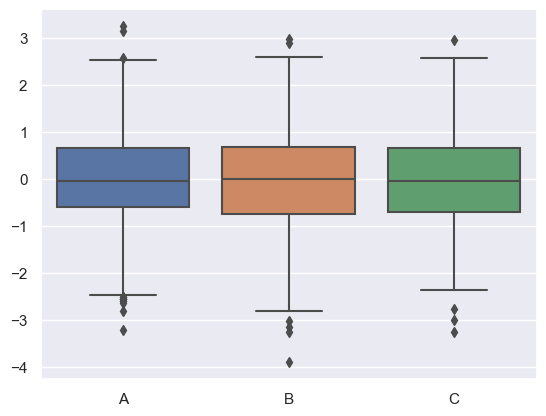

In [35]:
# df.plot.box();
sns.boxplot(df);

In [36]:
standard_deviations = 3
df1 = df[df.apply(lambda x: np.abs(x - x.mean()) / x.std() < standard_deviations)
           .all(axis=1)
        ]

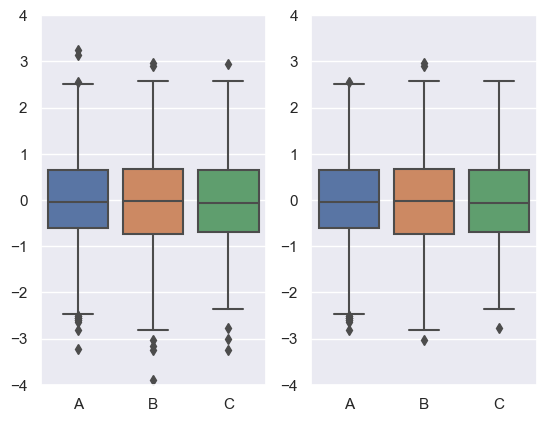

In [37]:
plt.subplot(1, 2, 1)
plt.ylim(-4, 4)
sns.boxplot(df)
plt.subplot(1, 2, 2)
plt.ylim(-4, 4)
sns.boxplot(df1);

In [38]:
standard_deviations = 3
df2 = df1[df1.apply(lambda x: np.abs(x - x.mean()) / x.std() < standard_deviations).
       all(axis=1)
  ]

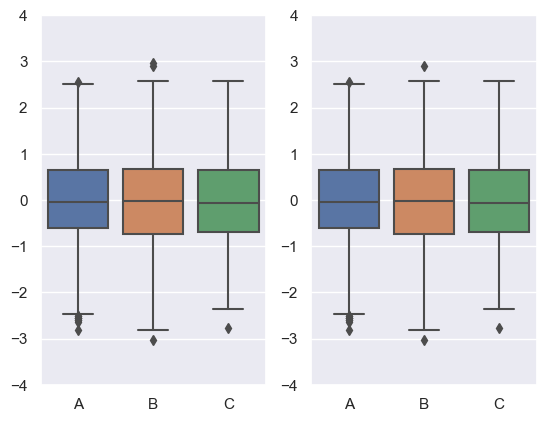

In [39]:
plt.subplot(1, 2, 1)
plt.ylim(-4, 4)
sns.boxplot(df1)
plt.subplot(1, 2, 2)
plt.ylim(-4, 4)
sns.boxplot(df2);

In [26]:
from scipy.stats import zscore

In [40]:
df1 = df[(np.abs(zscore(df)) < 3).all(axis=1)]

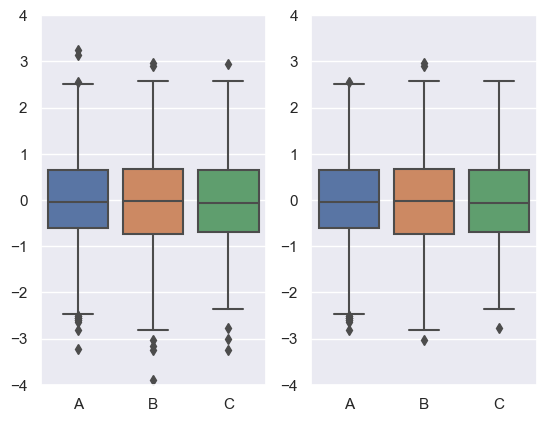

In [41]:
plt.subplot(1, 2, 1)
plt.ylim(-4, 4)
sns.boxplot(df)
plt.subplot(1, 2, 2)
plt.ylim(-4, 4)
sns.boxplot(df1);

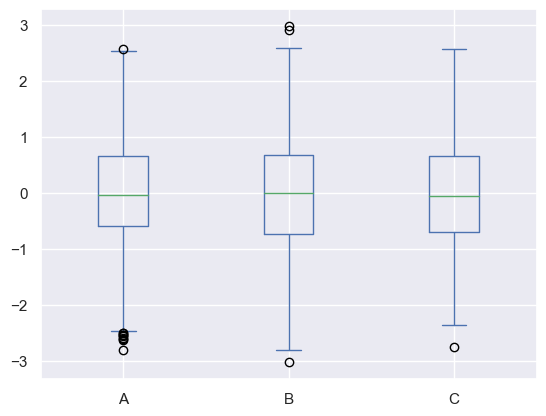

In [43]:
df1.plot.box();

In [49]:
zscore(df) - zscore(df1)

,A,B,C
0,0.030117,0.016233,-0.012390
1,-0.000253,0.008662,-0.000182
2,0.013819,0.016238,0.010950
3,0.008068,-0.010995,0.014903
4,-0.008564,0.008564,0.017150
...,...,...,...
995,0.009714,0.024718,-0.009234
996,0.018420,0.007101,-0.005697
997,-0.015174,0.014013,0.016317
998,-0.014387,-0.004144,0.009442


In [35]:
df = pd.DataFrame(np.random.randn(1000, 3), columns=list('ABC'))
df.head()

,A,B,C
0,0.512015,0.719861,-1.404335
1,-0.748650,1.083873,-0.505929
2,0.766852,2.157619,-0.744613
3,-1.561851,0.697597,0.026346
4,-0.883675,-0.013103,-0.205249


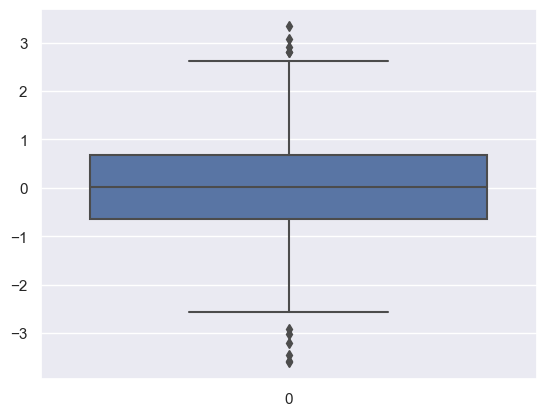

In [36]:
sns.boxplot(df.A);

In [37]:
q_1, q_3 = np.nanpercentile(df.A, [25, 75])
q_1, q_3

(-0.6425284702811308, 0.6716392468464375)

In [38]:
diff_3_1 = q_3 - q_1
up_thresh = q_3 + 1.5 * diff_3_1
low_thresh = q_1 - 1.5 * diff_3_1

In [44]:
df1 = df.A[(df.A > low_thresh) & (df.A < up_thresh)]

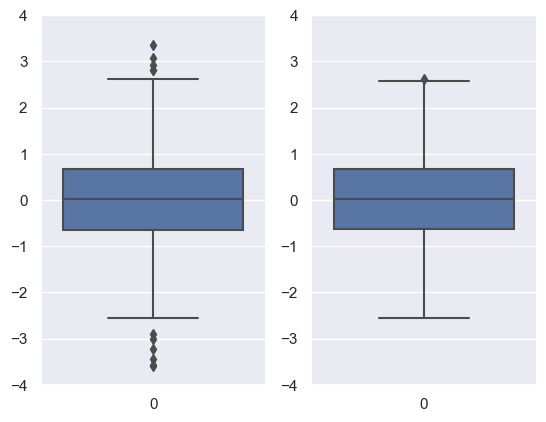

In [45]:
plt.subplot(1, 2, 1)
sns.boxplot(df.A)
plt.ylim(-4, 4)
plt.subplot(1, 2, 2)
sns.boxplot(df1)
plt.ylim(-4, 4);

In [1]:
def print_hello(name: str, upper: bool = False) -> None:
    print(f'Hello, {name}')
# def __init__(self, x: int, y: int) -> None:


title: str
name: str = 'John'

name = 10
title = [2, 5]

print(name)
print_hello(name)

10
Hello, 10


In [3]:
df_english = pd.DataFrame(
    {
        "student": ["John", "James", "Jennifer"],
        "gender": ["male", "male", "female"],
        "score": [20, 30, 30],
        "subject": "english"
    }
)

df_math = pd.DataFrame(
    {
        "student": ["John", "James", "Jennifer"],
        "gender": ["male", "male", "female"],
        "score": [90, 100, 95],
        "subject": "math"
    }
)

df = pd.concat(
    [df_english, df_math],
    ignore_index=True
)

df

,student,gender,score,subject
0,John,male,20,english
1,James,male,30,english
2,Jennifer,female,30,english
3,John,male,90,math
4,James,male,100,math
5,Jennifer,female,95,math


In [6]:
df.gender.map({'male': 0, 'female': 1})

0    0
1    0
2    1
3    0
4    0
5    1
Name: gender, dtype: int64

In [10]:
df.gender.map(lambda x: x.upper())

0      MALE
1      MALE
2    FEMALE
3      MALE
4      MALE
5    FEMALE
Name: gender, dtype: object

In [14]:
df.gender.map(pd.Series(['male', 0, 0, 0, 0, 0]))

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
Name: gender, dtype: object

In [15]:
df.groupby("subject")["score"] \
    .apply(
        lambda x: (x - x.mean()) / x.std()
    )

0   -1.154701
1    0.577350
2    0.577350
3   -1.000000
4    1.000000
5    0.000000
Name: score, dtype: float64

In [22]:
df.groupby("subject")["score"] \
    .apply(
        lambda x: x.sum()
    )

subject
english     80
math       285
Name: score, dtype: int64

In [65]:
df = pd.DataFrame(np.arange(20).reshape(5, 4), columns=list('ABCD'))

In [66]:
df1 = df.iloc[1:4, 1:3]
df1

,B,C
1,5,6
2,9,10
3,13,14


In [67]:
df1.loc[:, :] = '6.0'

In [68]:
df1

,B,C
1,6.0,6.0
2,6.0,6.0
3,6.0,6.0


In [69]:
df

,A,B,C,D
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11
3,12,13,14,15
4,16,17,18,19


заменится ли значение в исходном дф зависит от типов данных в замене. Ужас.

In [3]:
df = sns.load_dataset('taxis')
df.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


In [9]:
df['pickup_borough'].map(df.groupby(['pickup_borough'])[ 'total'].mean())

0       16.670507
1       16.670507
2       16.670507
3       16.670507
4       16.670507
          ...    
6428    16.670507
6429    31.660107
6430    19.236240
6431    19.236240
6432    19.236240
Name: pickup_borough, Length: 6433, dtype: float64

In [18]:
arr = df.distance.values

In [20]:
arr[3:13] = np.nan

In [21]:
arr[:15]

array([1.6 , 0.79, 1.37,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan, 1.75, 2.9 ])

In [24]:
np.nanpercentile(arr, [25, 75])

array([0.98, 3.21])

In [25]:
np.percentile(arr, [25, 75])

array([nan, nan])

In [27]:
np.nanmedian(arr)

1.64

In [3]:
df = sns.load_dataset('taxis')
df.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


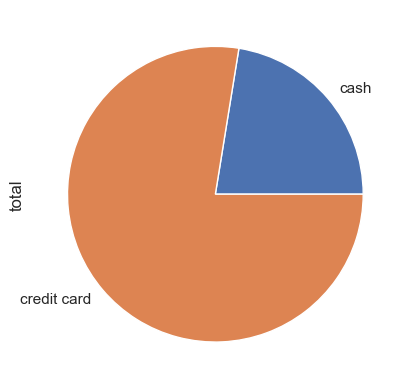

In [16]:
df.groupby('payment').total.agg('sum').plot.pie();

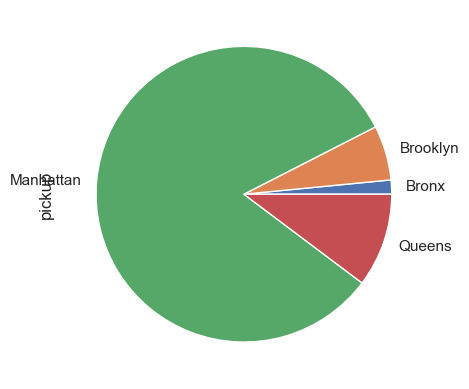

In [13]:
df.groupby('pickup_borough').pickup.agg('count').plot.pie();

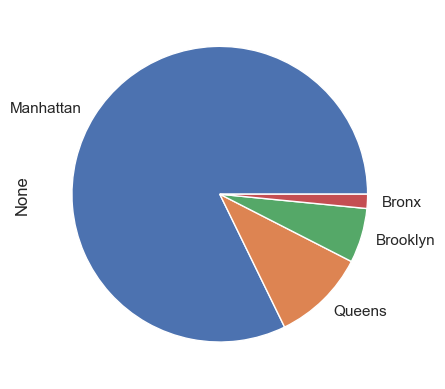

In [15]:
df.value_counts('pickup_borough').plot.pie();

In [17]:
df = pd.DataFrame(np.arange(20).reshape(5, 4), columns=list('ABCD'))

In [18]:
df

,A,B,C,D
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11
3,12,13,14,15
4,16,17,18,19


In [28]:
df2 = df.A
df2

0     0
1     4
2     8
3    12
4    16
Name: A, dtype: int32

In [30]:
df2[:] = 'x'
df2

0    x
1    x
2    x
3    x
4    x
Name: A, dtype: object

In [31]:
df

,A,B,C,D
0,x,1,2,3
1,x,5,6,7
2,x,9,10,11
3,x,13,14,15
4,x,17,18,19


In [39]:
df3 = df.loc[:, 'A':'A']
df3

,A
0,x
1,x
2,x
3,x
4,x


In [42]:
df3.loc[:] = 'z'
df3

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


,A
0,z
1,z
2,z
3,z
4,z


In [43]:
df

,A,B,C,D
0,x,1,2,3
1,x,5,6,7
2,x,9,10,11
3,x,13,14,15
4,x,17,18,19


In [44]:
df4 = df[['B', 'D']]
df4

,B,D
0,1,3
1,5,7
2,9,11
3,13,15
4,17,19


In [47]:
df4.iloc[:, :] = 'xyz'

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [48]:
df

,A,B,C,D
0,x,1,2,3
1,x,5,6,7
2,x,9,10,11
3,x,13,14,15
4,x,17,18,19


In [49]:
df4.iloc[:, :] = np.nan

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [50]:
df

,A,B,C,D
0,x,1,2,3
1,x,5,6,7
2,x,9,10,11
3,x,13,14,15
4,x,17,18,19


In [51]:
df4.iloc[:, :] = 123

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [52]:
df

,A,B,C,D
0,x,1,2,3
1,x,5,6,7
2,x,9,10,11
3,x,13,14,15
4,x,17,18,19


In [53]:
df4.loc[:, :] = 'xyz'

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [54]:
df

,A,B,C,D
0,x,1,2,3
1,x,5,6,7
2,x,9,10,11
3,x,13,14,15
4,x,17,18,19
